# P9 Étude de marché

## *1 - Librairies et fonctions*

In [1]:
# Importation des librairies
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.stats import pearsonr
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA


In [2]:
# Déclaration d'une fonction
def analyseDataFrame(df):
    """Fonction qui prend en arguments un dataframe pour analyse."""

    name =[x for x in globals() if globals()[x] is df][0]
    print("La dimension de DataFrame « " + name  +" » : " + str(df.shape) + " (lignes, colonnes)\n")
    display(temp_var = df.info())
    display(df.describe().T)
    display(df.head(5))
    
    # Afficher les colonnes qui sont unique dans le DataFrame df
    print("Test d'unicité sur les colonnes de DataFrame :")
    test_unicite = 0
    for col in df.columns :
        if df[col].size == df.drop_duplicates(col)[col].size :
          display(f'« {col:s} » est unique, et pourrait être une clé primaire.')
          test_unicite = 1
    if test_unicite == 0 :
        print("Il n'y a pas d'unicité dans aucune colonne. Il n'y a pas de clé primaire")

    print("Compter les nulles pour chaque colonne :")
    display(df.isnull().sum())
    
    print("Compter les duplicates:")
    display(df.duplicated().sum())
    

# *2 - Importation des fichiers et visualisation du DataFrame*

In [3]:
# Importation des données au format csv
Df_analyse = pd.read_csv("Df_analyse.csv")

# Visualisation de Df_analyse
analyseDataFrame(Df_analyse)


La dimension de DataFrame « Df_analyse » : (166, 45) (lignes, colonnes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 45 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Zone                                                             166 non-null    object 
 1   Année                                                            166 non-null    float64
 2   Alimentation pour touristes                                      166 non-null    float64
 3   Aliments pour animaux                                            166 non-null    float64
 4   Autres utilisations (non alimentaire)                            166 non-null    float64
 5   Disponibilité alimentaire (Kcal/personne/jour)                   166 non-null    float64
 6   Disponibilité alimentaire en quantité (kg/personne/an)           

,count,mean,std,min,25%,50%,75%,max
Année,166.0,2.017000e+03,0.000000,2017.000,2017.00000,2017.0000,2017.000000,2.017000e+03
Alimentation pour touristes,166.0,5.132530e+00,37.600378,-289.000,0.00000,0.0000,0.000000,2.400000e+02
Aliments pour animaux,166.0,6.572699e+03,16554.593980,0.000,145.50000,1177.5000,4840.500000,1.513890e+05
Autres utilisations (non alimentaire),166.0,4.923976e+03,29277.456425,0.000,50.00000,349.0000,2108.250000,3.331370e+05
Disponibilité alimentaire (Kcal/personne/jour),166.0,2.831645e+03,547.259265,0.000,2512.75000,2867.5000,3250.750000,3.770000e+03
Disponibilité alimentaire en quantité (kg/personne/an),166.0,6.872084e+02,213.367088,0.000,535.92500,677.9150,884.357500,1.260490e+03
Disponibilité de matière grasse en quantité (g/personne/jour),166.0,8.729139e+01,37.073427,0.000,57.33250,80.0750,113.555000,1.670000e+02
Disponibilité de protéines en quantité (g/personne/jour),166.0,8.040476e+01,22.000003,0.000,64.09750,80.8400,96.067500,1.413400e+02
Disponibilité intérieure,166.0,5.203435e+04,147833.404105,4.000,2703.75000,11558.5000,32583.000000,1.181350e+06
Exportations - Quantité,166.0,9.313410e+03,24187.871572,0.000,172.25000,852.5000,7207.500000,2.072780e+05


,Zone,Année,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,...,V-Variation de stock,V-Ratio_Autosuffisance,V-Ratio_Importations,Ratio_Autosuffisance,Ratio_Importations,Croissance_pop,Population_2017,PIB,Stabilité_Politique,CO2
0,Afghanistan,2017.0,0.0,456.0,94.0,1997.0,357.31,30.63,54.09,15139.0,...,0.0,49.12,7991.23,76.68,30.09,12.48,36296.113,2058.4,-2.80,132.7927
1,Afrique du Sud,2017.0,0.0,9371.0,1448.0,2987.0,556.42,81.92,83.36,66840.0,...,0.0,78.71,425.87,102.42,13.49,6.19,57009.756,13860.3,-0.28,10778.1180
2,Albanie,2017.0,0.0,697.0,177.0,3400.0,1260.49,117.57,119.50,4879.0,...,4.0,27.66,1880.85,86.72,18.12,-0.68,2884.169,12771.0,0.38,425.6499
3,Algérie,2017.0,0.0,4884.0,2405.0,3345.0,798.71,79.62,92.85,45365.0,...,0.0,99.28,7118.41,58.99,43.47,8.52,41389.189,11737.4,-0.92,387.1334
4,Allemagne,2017.0,0.0,30904.0,8316.0,3559.0,943.24,147.96,104.07,174960.0,...,-29.0,87.06,3826.91,95.92,38.04,1.83,82658.409,53071.5,0.59,17581.3788


Test d'unicité sur les colonnes de DataFrame :


'« Zone » est unique, et pourrait être une clé primaire.'

'« Disponibilité intérieure » est unique, et pourrait être une clé primaire.'

'« Importations - Quantité » est unique, et pourrait être une clé primaire.'

'« Nourriture » est unique, et pourrait être une clé primaire.'

'« Ratio_Autosuffisance » est unique, et pourrait être une clé primaire.'

'« Population_2017 » est unique, et pourrait être une clé primaire.'

'« PIB » est unique, et pourrait être une clé primaire.'

'« CO2 » est unique, et pourrait être une clé primaire.'

Compter les nulles pour chaque colonne :


Zone                                                               0
Année                                                              0
Alimentation pour touristes                                        0
Aliments pour animaux                                              0
Autres utilisations (non alimentaire)                              0
Disponibilité alimentaire (Kcal/personne/jour)                     0
Disponibilité alimentaire en quantité (kg/personne/an)             0
Disponibilité de matière grasse en quantité (g/personne/jour)      0
Disponibilité de protéines en quantité (g/personne/jour)           0
Disponibilité intérieure                                           0
Exportations - Quantité                                            0
Importations - Quantité                                            0
Nourriture                                                         0
Pertes                                                             0
Production                        

Compter les duplicates:


0

In [4]:
display(temp_var = Df_analyse.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 45 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Zone                                                             166 non-null    object 
 1   Année                                                            166 non-null    float64
 2   Alimentation pour touristes                                      166 non-null    float64
 3   Aliments pour animaux                                            166 non-null    float64
 4   Autres utilisations (non alimentaire)                            166 non-null    float64
 5   Disponibilité alimentaire (Kcal/personne/jour)                   166 non-null    float64
 6   Disponibilité alimentaire en quantité (kg/personne/an)           166 non-null    float64
 7   Disponibilité de matière grasse en quantité 

In [5]:
# Choix des colonnes
Df_analyse = Df_analyse[[
    "Zone",
    "Disponibilité alimentaire (Kcal/personne/jour)",
    "Disponibilité de protéines en quantité (g/personne/jour)",
    "Ratio_Autosuffisance",
    "V-Importations - Quantité",
    "Croissance_pop",
    "PIB"]]

# Visualisation de Df_analyse
analyseDataFrame(Df_analyse)


La dimension de DataFrame « Df_analyse » : (166, 7) (lignes, colonnes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 7 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Zone                                                      166 non-null    object 
 1   Disponibilité alimentaire (Kcal/personne/jour)            166 non-null    float64
 2   Disponibilité de protéines en quantité (g/personne/jour)  166 non-null    float64
 3   Ratio_Autosuffisance                                      166 non-null    float64
 4   V-Importations - Quantité                                 166 non-null    float64
 5   Croissance_pop                                            166 non-null    float64
 6   PIB                                                       166 non-null    float64
dtypes: float64(6), object(1)
memory usag

,count,mean,std,min,25%,50%,75%,max
Disponibilité alimentaire (Kcal/personne/jour),166.0,2831.644578,547.259265,0.00,2512.7500,2867.500,3250.7500,3770.00
Disponibilité de protéines en quantité (g/personne/jour),166.0,80.404759,22.000003,0.00,64.0975,80.840,96.0675,141.34
Ratio_Autosuffisance,166.0,93.800602,49.257801,0.00,76.8375,90.660,106.2800,492.25
V-Importations - Quantité,166.0,85.349398,185.990285,0.00,3.0000,16.000,77.5000,1069.00
Croissance_pop,166.0,5.557169,5.049500,-5.43,1.9425,4.985,9.0975,23.94
PIB,166.0,20958.227108,21449.960390,912.80,5057.8000,13509.500,29921.4750,126144.00


,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Ratio_Autosuffisance,V-Importations - Quantité,Croissance_pop,PIB
0,Afghanistan,1997.0,54.09,76.68,29.0,12.48,2058.4
1,Afrique du Sud,2987.0,83.36,102.42,514.0,6.19,13860.3
2,Albanie,3400.0,119.50,86.72,38.0,-0.68,12771.0
3,Algérie,3345.0,92.85,58.99,2.0,8.52,11737.4
4,Allemagne,3559.0,104.07,95.92,842.0,1.83,53071.5


Test d'unicité sur les colonnes de DataFrame :


'« Zone » est unique, et pourrait être une clé primaire.'

'« Ratio_Autosuffisance » est unique, et pourrait être une clé primaire.'

'« PIB » est unique, et pourrait être une clé primaire.'

Compter les nulles pour chaque colonne :


Zone                                                        0
Disponibilité alimentaire (Kcal/personne/jour)              0
Disponibilité de protéines en quantité (g/personne/jour)    0
Ratio_Autosuffisance                                        0
V-Importations - Quantité                                   0
Croissance_pop                                              0
PIB                                                         0
dtype: int64

Compter les duplicates:


0

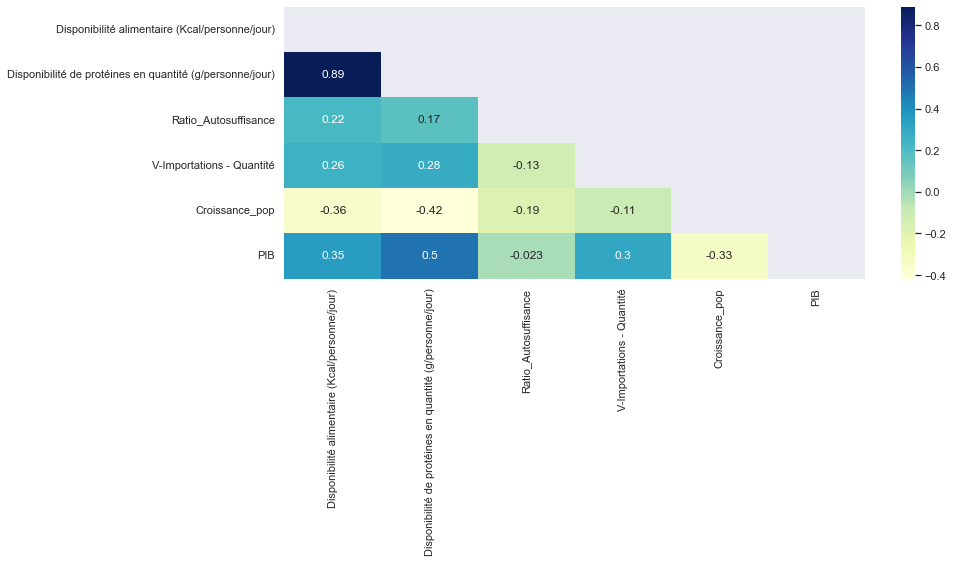

In [6]:
# Calcul pairwise-correlation
matrix = Df_analyse.corr()

# Triangle de corrélations
mask = np.triu(np.ones_like(matrix, dtype=np.bool_))
plt.figure(figsize=(13, 5))
sns.heatmap(matrix, mask=mask, annot=True, cmap="YlGnBu")
plt.show()


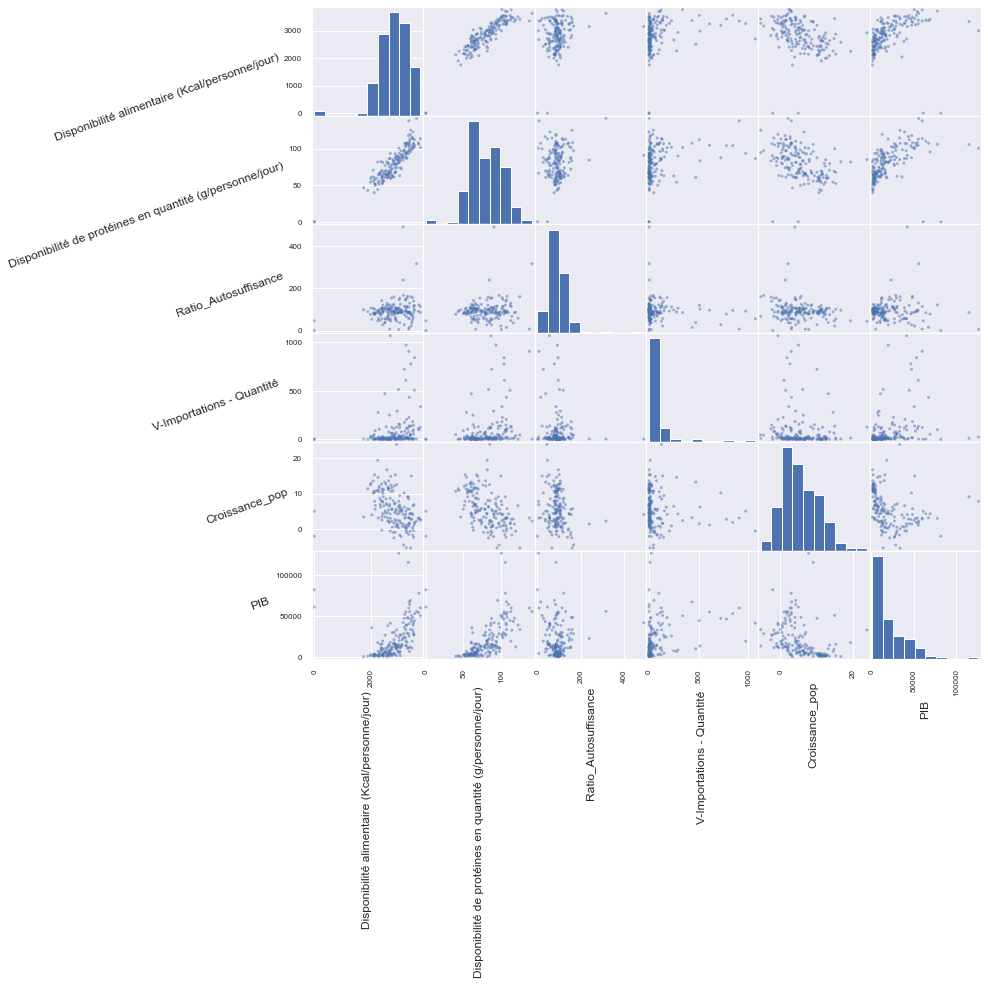

In [7]:
# Graphique - croisement deux à deux des variables
# Décele si deux variables varient dans le même sens
A = pd.plotting.scatter_matrix(Df_analyse,figsize=(12,12))
for ax in A.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(20)
    ax.yaxis.label.set_ha("right")
    

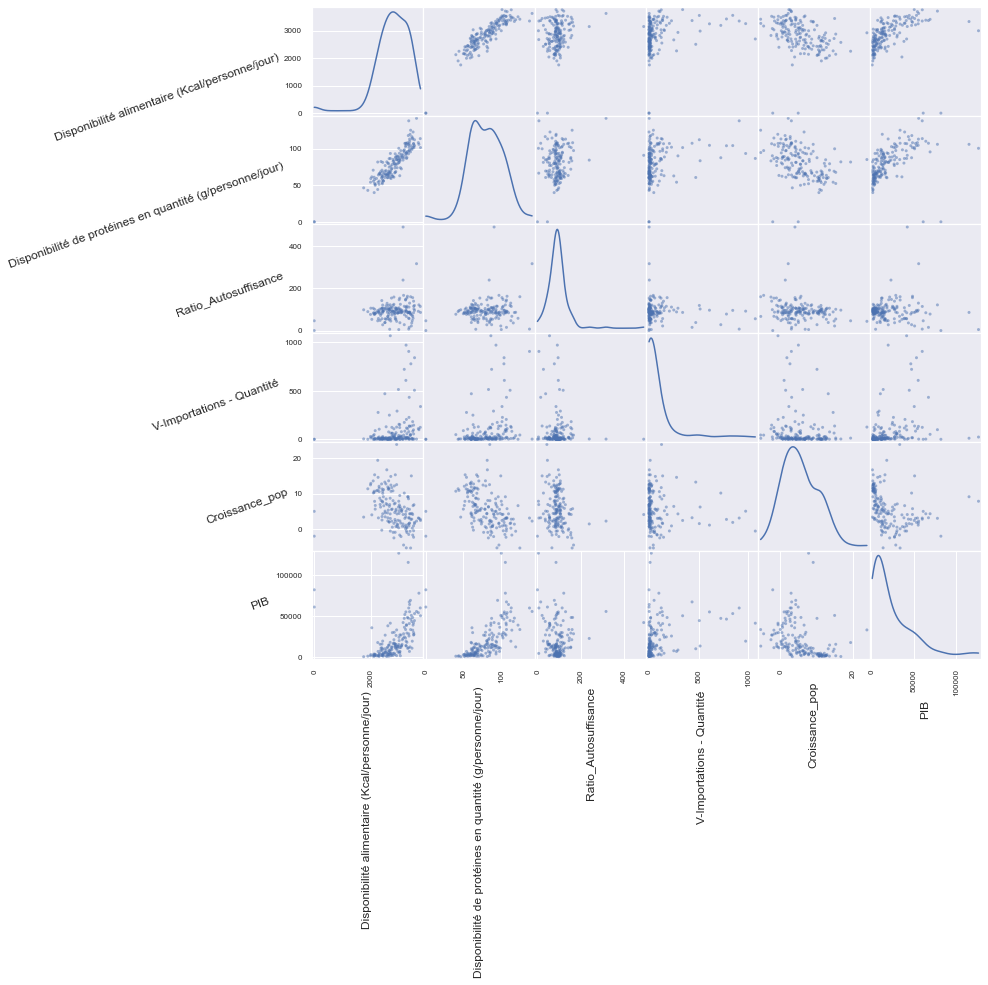

In [8]:
# Graphique - croisement deux à deux des variables
# Décele si deux variables varient dans le même sens
A = pd.plotting.scatter_matrix(Df_analyse,figsize=(12,12), diagonal = "kde")
for ax in A.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(20)
    ax.yaxis.label.set_ha("right")


# *3 - Normalisation des données*

In [9]:
# Suppression des valeur string pour la normalisation des données
Df_normalise = Df_analyse.drop(columns= ["Zone"])
analyseDataFrame(Df_normalise)


La dimension de DataFrame « Df_normalise » : (166, 6) (lignes, colonnes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 6 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Disponibilité alimentaire (Kcal/personne/jour)            166 non-null    float64
 1   Disponibilité de protéines en quantité (g/personne/jour)  166 non-null    float64
 2   Ratio_Autosuffisance                                      166 non-null    float64
 3   V-Importations - Quantité                                 166 non-null    float64
 4   Croissance_pop                                            166 non-null    float64
 5   PIB                                                       166 non-null    float64
dtypes: float64(6)
memory usage: 7.9 KB


,count,mean,std,min,25%,50%,75%,max
Disponibilité alimentaire (Kcal/personne/jour),166.0,2831.644578,547.259265,0.00,2512.7500,2867.500,3250.7500,3770.00
Disponibilité de protéines en quantité (g/personne/jour),166.0,80.404759,22.000003,0.00,64.0975,80.840,96.0675,141.34
Ratio_Autosuffisance,166.0,93.800602,49.257801,0.00,76.8375,90.660,106.2800,492.25
V-Importations - Quantité,166.0,85.349398,185.990285,0.00,3.0000,16.000,77.5000,1069.00
Croissance_pop,166.0,5.557169,5.049500,-5.43,1.9425,4.985,9.0975,23.94
PIB,166.0,20958.227108,21449.960390,912.80,5057.8000,13509.500,29921.4750,126144.00


,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Ratio_Autosuffisance,V-Importations - Quantité,Croissance_pop,PIB
0,1997.0,54.09,76.68,29.0,12.48,2058.4
1,2987.0,83.36,102.42,514.0,6.19,13860.3
2,3400.0,119.50,86.72,38.0,-0.68,12771.0
3,3345.0,92.85,58.99,2.0,8.52,11737.4
4,3559.0,104.07,95.92,842.0,1.83,53071.5


Test d'unicité sur les colonnes de DataFrame :


'« Ratio_Autosuffisance » est unique, et pourrait être une clé primaire.'

'« PIB » est unique, et pourrait être une clé primaire.'

Compter les nulles pour chaque colonne :


Disponibilité alimentaire (Kcal/personne/jour)              0
Disponibilité de protéines en quantité (g/personne/jour)    0
Ratio_Autosuffisance                                        0
V-Importations - Quantité                                   0
Croissance_pop                                              0
PIB                                                         0
dtype: int64

Compter les duplicates:


0

In [10]:

Df_analyse.set_index("Zone", inplace=True)

# Soustraire la moyenne de chaque colonne à chaque valeur : centrer les valeurs
analyse_CR_df = Df_analyse.sub(Df_analyse.mean())
print("Means : \n",Df_analyse.mean())
print()

# Divisé les valeurs de la dataframe par l'écart-type de chaque colonne
analyse_CR_df = analyse_CR_df.div(Df_analyse.std()) 
print("Ecart-type : \n",Df_analyse.std() )


Means : 
 Disponibilité alimentaire (Kcal/personne/jour)               2831.644578
Disponibilité de protéines en quantité (g/personne/jour)       80.404759
Ratio_Autosuffisance                                           93.800602
V-Importations - Quantité                                      85.349398
Croissance_pop                                                  5.557169
PIB                                                         20958.227108
dtype: float64

Ecart-type : 
 Disponibilité alimentaire (Kcal/personne/jour)                547.259265
Disponibilité de protéines en quantité (g/personne/jour)       22.000003
Ratio_Autosuffisance                                           49.257801
V-Importations - Quantité                                     185.990285
Croissance_pop                                                  5.049500
PIB                                                         21449.960390
dtype: float64


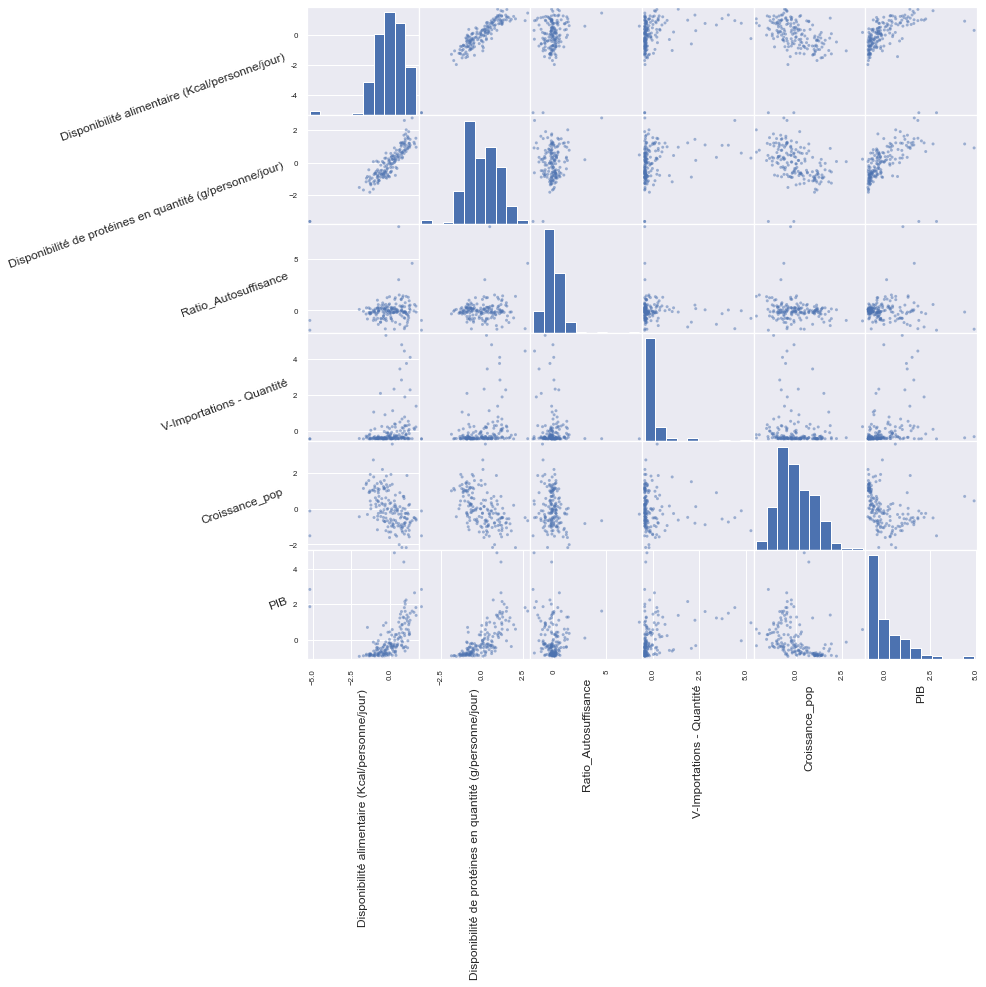

In [11]:
# Graphique - croisement deux à deux des variables
# Décele si deux variables varient dans le même sens
A = pd.plotting.scatter_matrix(analyse_CR_df,figsize=(12,12))
for ax in A.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(20)
    ax.yaxis.label.set_ha("right")

### Normalisation des données avec la méthode StandardScaler 
#### - Transforme les données en une valeur moyenne de 0 et un écart type de 1

In [12]:
# Normalisation des données
print(Df_normalise.columns)
std_scale = preprocessing.StandardScaler().fit(Df_normalise)
X_scaled = std_scale.transform(Df_normalise)
X_scaled


Index(['Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Ratio_Autosuffisance', 'V-Importations - Quantité', 'Croissance_pop',
       'PIB'],
      dtype='object')


array([[-1.52975022e+00, -1.19974441e+00, -3.48623046e-01,
        -3.03886277e-01,  1.37514173e+00, -8.83778452e-01],
       [ 2.84737956e-01,  1.34735561e-01,  1.75514890e-01,
         2.31166687e+00,  1.25704748e-01, -3.31907535e-01],
       [ 1.04169111e+00,  1.78243307e+00, -1.44180743e-01,
        -2.55350239e-01, -1.23894264e+00, -3.82844502e-01],
       [ 9.40886207e-01,  5.67404331e-01, -7.08840610e-01,
        -4.49494391e-01,  5.88532756e-01, -4.31176871e-01],
       [ 1.33310890e+00,  1.07894739e+00,  4.31568252e-02,
         4.08053581e+00, -7.40359681e-01,  1.50165493e+00],
       [-1.03672263e+00, -1.19974441e+00, -1.06916857e-01,
         1.03355121e+00,  1.79824202e+00, -6.38165289e-01],
       [-7.37973564e-01,  3.39770802e-02, -1.35250806e+00,
        -4.22529925e-01, -2.55681423e-01, -5.22756046e-02],
       [ 6.64130939e-01,  3.23942662e-01, -1.34212304e+00,
         3.43338864e+00,  9.12313724e-01,  1.23206263e+00],
       [ 7.46607675e-01,  1.01466256e+00,  1.099

# 4 - CAH (  Classification Ascendante Hierrarchique)
#### - Création des groupes d'individus homogènes

In [13]:
# Visualisation du dataFrame "Df_normalise"
Df_normalise


,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Ratio_Autosuffisance,V-Importations - Quantité,Croissance_pop,PIB
0,1997.0,54.09,76.68,29.0,12.48,2058.4
1,2987.0,83.36,102.42,514.0,6.19,13860.3
2,3400.0,119.50,86.72,38.0,-0.68,12771.0
3,3345.0,92.85,58.99,2.0,8.52,11737.4
4,3559.0,104.07,95.92,842.0,1.83,53071.5
...,...,...,...,...,...,...
161,3370.0,107.26,15.20,433.0,3.15,67183.6
162,2585.0,65.77,129.54,0.0,6.86,11617.9
163,3762.0,113.61,114.62,123.0,2.74,59914.8
164,2304.0,65.64,93.38,1.0,11.55,2021.6


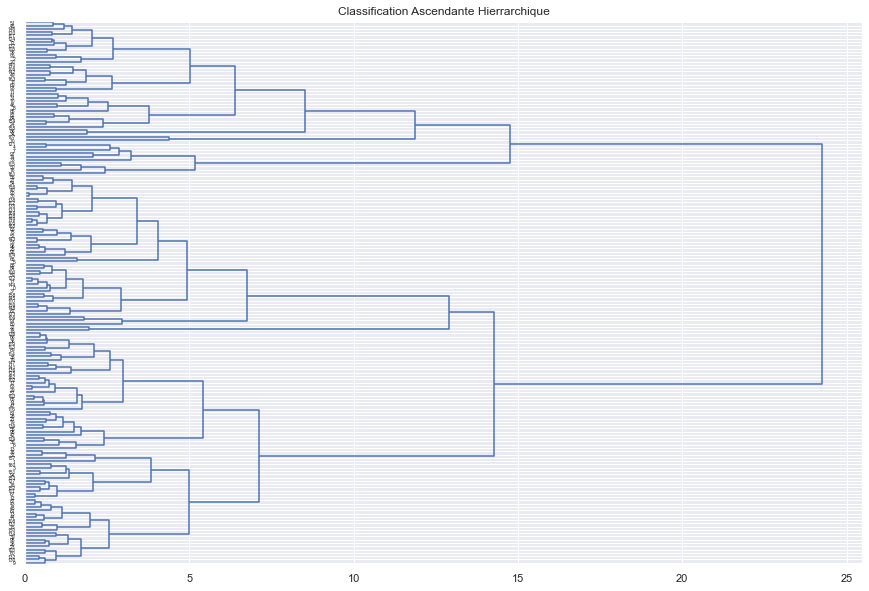

In [14]:
# Générer la matrice des liens
Z = linkage(X_scaled,method="ward", metric="euclidean")

# Affichage du dendrogramme
plt.figure(figsize=(15,10))
plt.title("Classification Ascendante Hierrarchique")
dendrogram(Z,labels=Df_normalise.index,orientation="right", color_threshold=0)

plt.show()


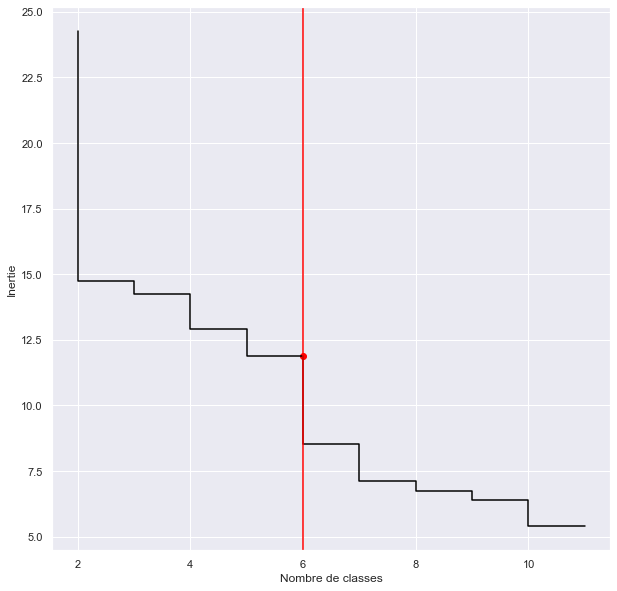

[24.25379825 14.7432421  14.26628558 12.90374488 11.88230585  8.53521184
  7.11217232  6.74337984  6.38250444  5.42305801]


In [15]:
# Diagramme d'inertie, identifie le nombre optimal de catégories
plt.figure(figsize=(10, 10))

last = Z[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(2, len(last) + 2)
plt.step(idxs, last_rev, c="black")
plt.xlabel("Nombre de classes")
plt.ylabel("Inertie")
nb_cluster =6
plt.scatter(idxs[np.where(idxs==nb_cluster)], last_rev[np.where(idxs==nb_cluster)], c="red")
plt.axvline(idxs[np.where(idxs==nb_cluster)], c="red")
plt.show()
print(last_rev)


#### - Découpage du dendrogramme pour déterliner les catégories

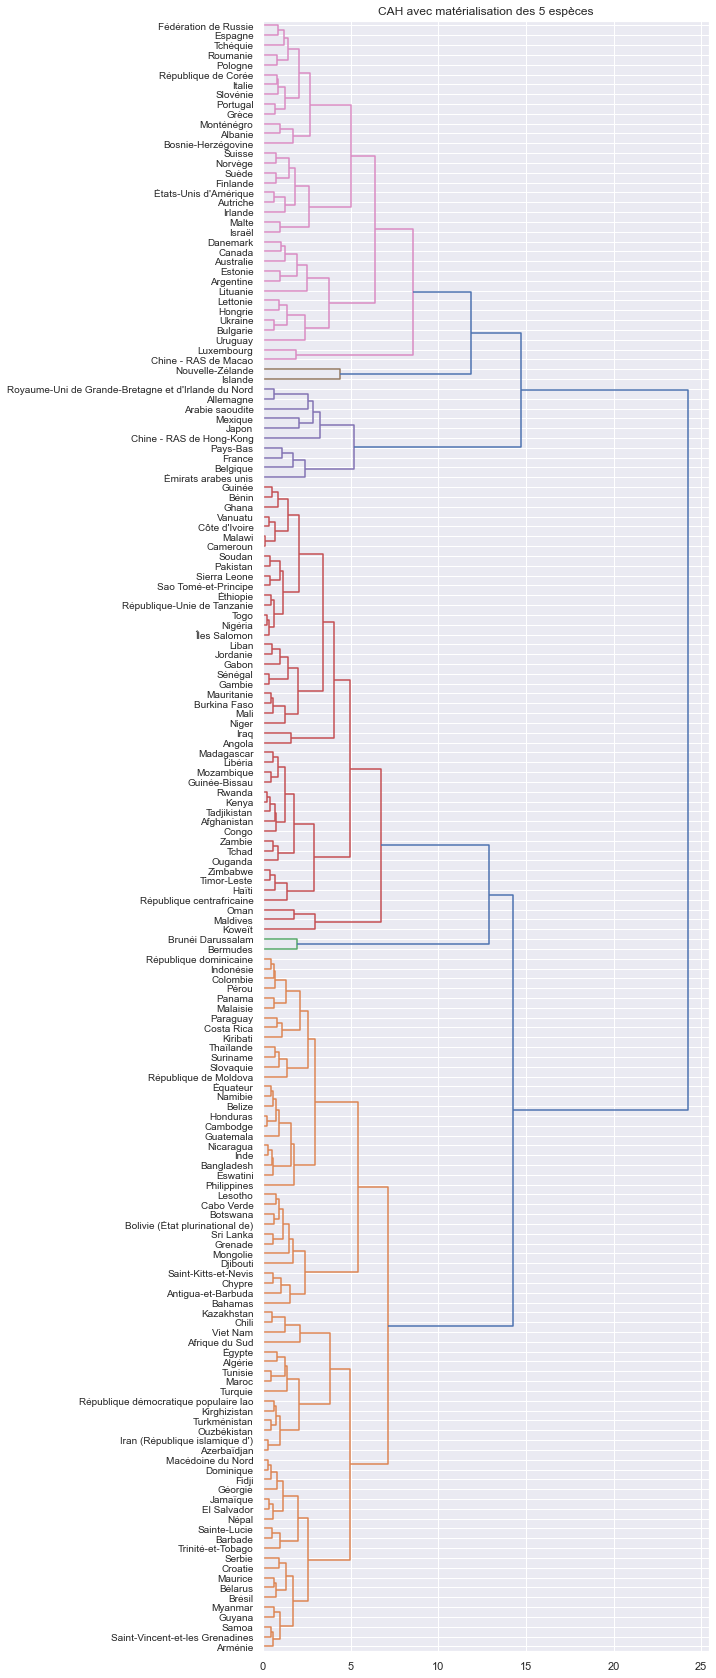

Nombre des classes :  6


In [16]:
# Matérialisation des 5 espèces (hauteur t = 450000)
plt.figure(figsize=(8,30))
plt.title("CAH avec matérialisation des 5 espèces")

Coupe = 10
dendrogram(Z,labels=Df_analyse.index,orientation="right",color_threshold=Coupe, leaf_font_size=10.0)
plt.show()

# Découpage à la hauteur t = XXXX : X groupes obtenus
groupes_cah = fcluster(Z,t=Coupe,criterion="distance")
# print(groupes_cah)
print("Nombre des classes : ", groupes_cah.max())


# Trie des groupes
idg = np.argsort(groupes_cah)


In [17]:
# Affichage de la liste des pays regroupé par cluster
Df_analyse_clusters = Df_analyse.reset_index().copy()
Df_analyse_clusters["cluster"] = groupes_cah
Df_analyse_clusters.sort_values(by=["cluster"])
Df_analyse_clusters.head(5)

for k in np.unique(groupes_cah) :
    print(f"Cluster {k}:")
    print(Df_analyse_clusters[Df_analyse_clusters["cluster"] == k]["Zone"].to_list())


Cluster 1:
['Afrique du Sud', 'Algérie', 'Antigua-et-Barbuda', 'Arménie', 'Azerbaïdjan', 'Bahamas', 'Bangladesh', 'Barbade', 'Belize', 'Bolivie (État plurinational de)', 'Botswana', 'Brésil', 'Bélarus', 'Cabo Verde', 'Cambodge', 'Chili', 'Chypre', 'Colombie', 'Costa Rica', 'Croatie', 'Djibouti', 'Dominique', 'El Salvador', 'Eswatini', 'Fidji', 'Grenade', 'Guatemala', 'Guyana', 'Géorgie', 'Honduras', 'Inde', 'Indonésie', "Iran (République islamique d')", 'Jamaïque', 'Kazakhstan', 'Kirghizistan', 'Kiribati', 'Lesotho', 'Macédoine du Nord', 'Malaisie', 'Maroc', 'Maurice', 'Mongolie', 'Myanmar', 'Namibie', 'Nicaragua', 'Népal', 'Ouzbékistan', 'Panama', 'Paraguay', 'Philippines', 'Pérou', 'République de Moldova', 'République dominicaine', 'République démocratique populaire lao', 'Saint-Kitts-et-Nevis', 'Saint-Vincent-et-les Grenadines', 'Sainte-Lucie', 'Samoa', 'Serbie', 'Slovaquie', 'Sri Lanka', 'Suriname', 'Thaïlande', 'Trinité-et-Tobago', 'Tunisie', 'Turkménistan', 'Turquie', 'Viet Nam',

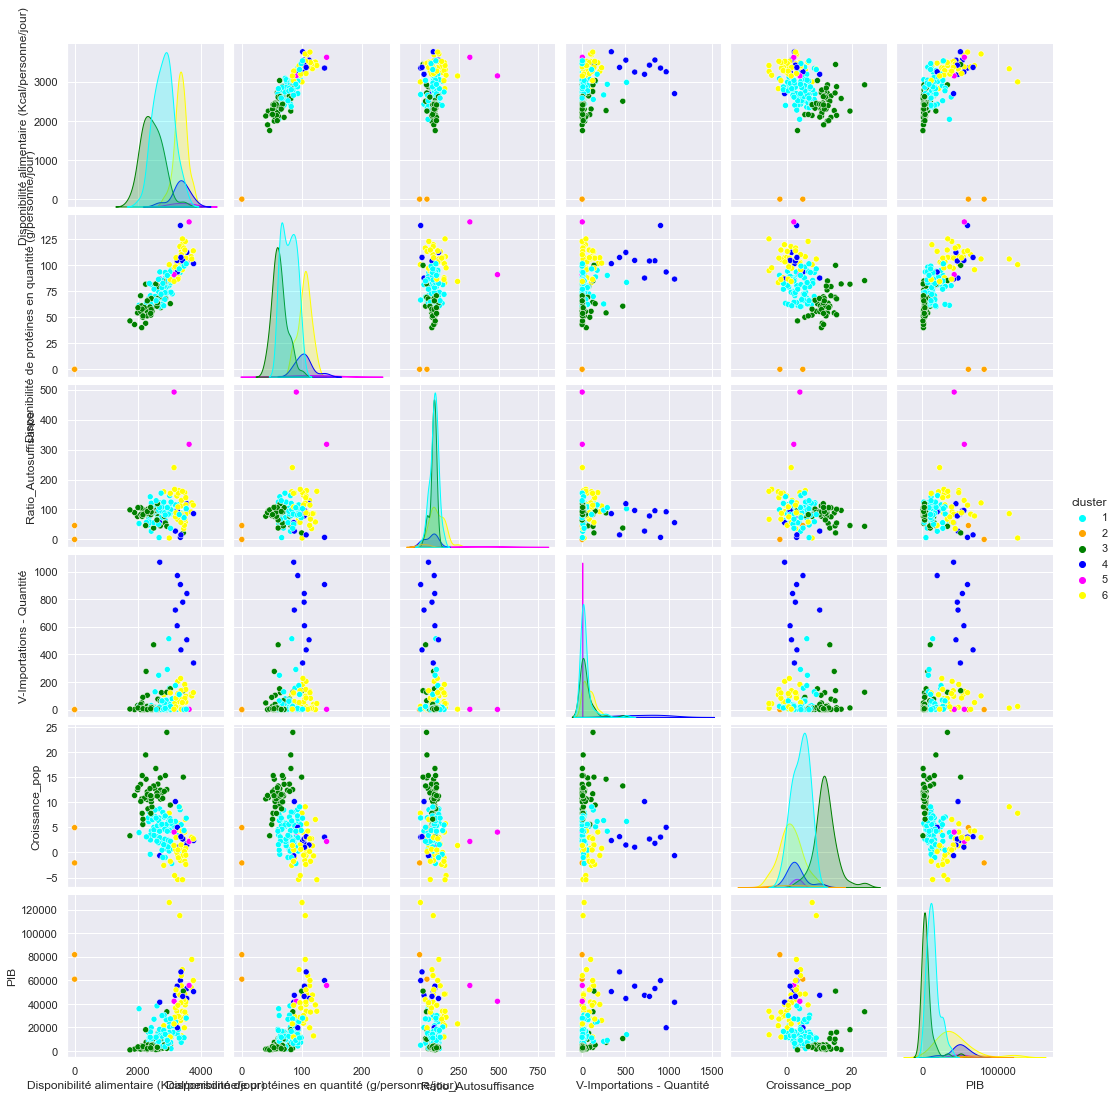

In [18]:
# Visualisation des relations entre différents caractéristiques
_ = sns.pairplot(Df_analyse_clusters, hue="cluster", 
             palette = {1: "cyan", 2: "orange", 3:"green", 4:"blue", 5:"magenta", 6:"yellow", 7:"brown", 8:"olive"})

In [19]:
analyse_CR_clusters_df = analyse_CR_df.copy()
analyse_CR_clusters_df["cluster"] = groupes_cah
analyse_CR_clusters_df.sort_values(by=["cluster"])


,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Ratio_Autosuffisance,V-Importations - Quantité,Croissance_pop,PIB,cluster
Zone,,,,,,,
Eswatini,-0.777775,-0.872034,0.246852,-0.448138,-0.409381,-0.585093,1
République de Moldova,-0.794221,-0.776580,0.990085,-0.372866,-1.173813,-0.433890,1
Géorgie,0.071914,-0.159762,-0.605602,-0.184684,-1.296597,-0.343522,1
Guyana,0.092014,0.326147,0.301260,-0.458892,-0.684656,-0.417382,1
République dominicaine,0.044504,-0.615671,-0.097662,-0.233073,-0.183616,-0.196869,1
...,...,...,...,...,...,...,...
Slovénie,0.673091,0.812965,-0.376602,-0.351359,-0.973793,0.724914,6
Luxembourg,0.917948,1.153874,-0.155115,-0.399749,0.701620,4.383587,6
Suisse,1.064131,0.684329,-0.313465,-0.184684,-0.252930,2.244544,6


Disponibilité alimentaire (Kcal/personne/jour)
Disponibilité de protéines en quantité (g/personne/jour)
Ratio_Autosuffisance
V-Importations - Quantité
Croissance_pop
PIB


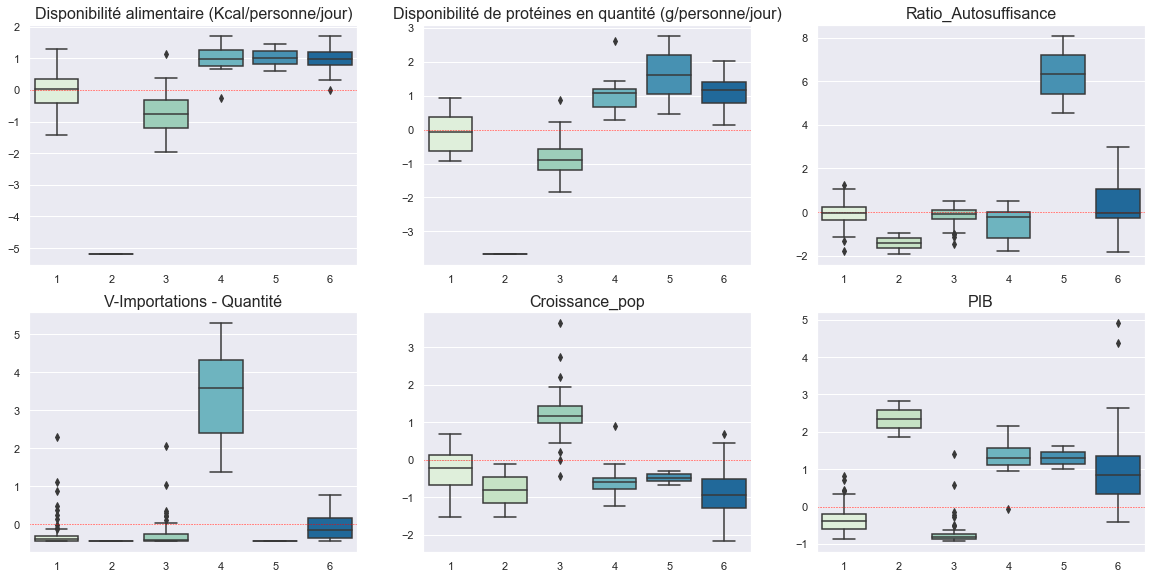

In [20]:
# Visualisationdes clusters par variables avec graphique Boxplot 
liste_var = Df_analyse.columns

fig = plt.figure(figsize=(20,15),constrained_layout=False)
i = 331

for var in liste_var :
    print(var)
    ax = fig.add_subplot(i)
    sns.boxplot(x="cluster", 
                y=var, 
                data=analyse_CR_clusters_df,
                palette ="GnBu").set(
                                        xlabel='', 
                                        ylabel=''
                                    )
    ax.axhline(y = 0.0, color ="red", linestyle ="--", linewidth=0.5) 
    _ = plt.title(var, fontsize=16)
    i+=1
    

# 5 - ACP

In [21]:
# x matrice des données
x = Df_normalise.values
x[:5]


array([[ 1.99700e+03,  5.40900e+01,  7.66800e+01,  2.90000e+01,
         1.24800e+01,  2.05840e+03],
       [ 2.98700e+03,  8.33600e+01,  1.02420e+02,  5.14000e+02,
         6.19000e+00,  1.38603e+04],
       [ 3.40000e+03,  1.19500e+02,  8.67200e+01,  3.80000e+01,
        -6.80000e-01,  1.27710e+04],
       [ 3.34500e+03,  9.28500e+01,  5.89900e+01,  2.00000e+00,
         8.52000e+00,  1.17374e+04],
       [ 3.55900e+03,  1.04070e+02,  9.59200e+01,  8.42000e+02,
         1.83000e+00,  5.30715e+04]])

In [22]:
type(x) # Donne le type du tableau "x"

numpy.ndarray

In [23]:
x.shape # Donne le nombre de lignes et de colonnes que contient le dataFrame

(166, 6)

In [24]:
# Ètiquettes de ligne
names = Df_normalise.index
names


RangeIndex(start=0, stop=166, step=1)

In [25]:
# Étiquettes de colonne
variables = Df_normalise.columns
variables

Index(['Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Ratio_Autosuffisance', 'V-Importations - Quantité', 'Croissance_pop',
       'PIB'],
      dtype='object')

In [26]:
# On éspère avoir une moyenne à 0 et un écart type à 1
idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]


,0,1,2,3,4,5
mean,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0


In [27]:
# 5 composantes choisies
# n_components = 8
n_components = x.shape[1]


In [28]:
# Association de l'ACP
pca = PCA(n_components=n_components)


In [29]:
# Entrainement sur les données scalées
pca.fit(X_scaled)


PCA(n_components=6)

In [30]:
# Variance captée par chaque nouvelle composante
pca.explained_variance_ratio_


array([0.44110309, 0.20094806, 0.12912436, 0.11518834, 0.0979741 ,
       0.01566206])

In [31]:
# Enregistrement dans une variable du pourcentage capté de la variance de nos données initiales
scree = (pca.explained_variance_ratio_*100).round(2)
scree


array([44.11, 20.09, 12.91, 11.52,  9.8 ,  1.57])

In [32]:
#Somme Cumulée des composantes
scree_cum = scree.cumsum().round()
scree_cum


array([ 44.,  64.,  77.,  89.,  98., 100.])

In [33]:
### Définition d'une variable avec la liste des composantes
x_list = range(1, n_components+1)
list(x_list)


[1, 2, 3, 4, 5, 6]

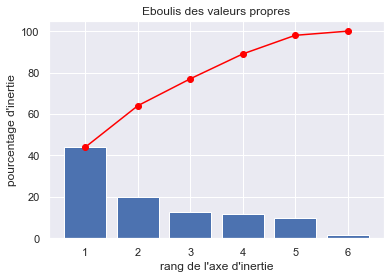

In [34]:
# Affichage de façon graphique
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)


### En bleu la variance de chaque nouvelle composente et en rouge la variance cumulée.
### 100% de la variance est comprise dans les 6 premières composantes.

In [35]:
pcs = pca.components_
pcs


array([[-0.53330597, -0.56512029, -0.14373536, -0.26698965,  0.37299873,
        -0.40638949],
       [ 0.11965618,  0.04492186,  0.73278172, -0.56868692, -0.19998771,
        -0.28860956],
       [-0.37983034, -0.220131  , -0.19197622, -0.29256958, -0.72471775,
         0.3995042 ],
       [-0.29720363, -0.30272062,  0.55221239,  0.69384331, -0.18330928,
        -0.00841931],
       [-0.16308955, -0.04164773,  0.31545794, -0.19498662,  0.51068358,
         0.75718957],
       [-0.66488184,  0.73265893,  0.03261897,  0.01662642,  0.03551098,
        -0.13616743]])

In [36]:
pcs = pd.DataFrame(pcs)
pcs


,0,1,2,3,4,5
0,-0.533306,-0.565120,-0.143735,-0.266990,0.372999,-0.406389
1,0.119656,0.044922,0.732782,-0.568687,-0.199988,-0.288610
2,-0.379830,-0.220131,-0.191976,-0.292570,-0.724718,0.399504
3,-0.297204,-0.302721,0.552212,0.693843,-0.183309,-0.008419
4,-0.163090,-0.041648,0.315458,-0.194987,0.510684,0.757190
5,-0.664882,0.732659,0.032619,0.016626,0.035511,-0.136167


In [37]:
# Enregistrement des résultats dans une variables
features = pcs.columns
features

# Les résultats son arrondi pour simplifier l'analyse
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)


,0,1,2,3,4,5
F1,-0.53,-0.57,-0.14,-0.27,0.37,-0.41
F2,0.12,0.04,0.73,-0.57,-0.20,-0.29
F3,-0.38,-0.22,-0.19,-0.29,-0.72,0.40
F4,-0.30,-0.30,0.55,0.69,-0.18,-0.01
F5,-0.16,-0.04,0.32,-0.19,0.51,0.76
F6,-0.66,0.73,0.03,0.02,0.04,-0.14


In [38]:
pcs.T

,F1,F2,F3,F4,F5,F6
0,-0.533306,0.119656,-0.379830,-0.297204,-0.163090,-0.664882
1,-0.565120,0.044922,-0.220131,-0.302721,-0.041648,0.732659
2,-0.143735,0.732782,-0.191976,0.552212,0.315458,0.032619
3,-0.266990,-0.568687,-0.292570,0.693843,-0.194987,0.016626
4,0.372999,-0.199988,-0.724718,-0.183309,0.510684,0.035511
5,-0.406389,-0.288610,0.399504,-0.008419,0.757190,-0.136167


<AxesSubplot:>

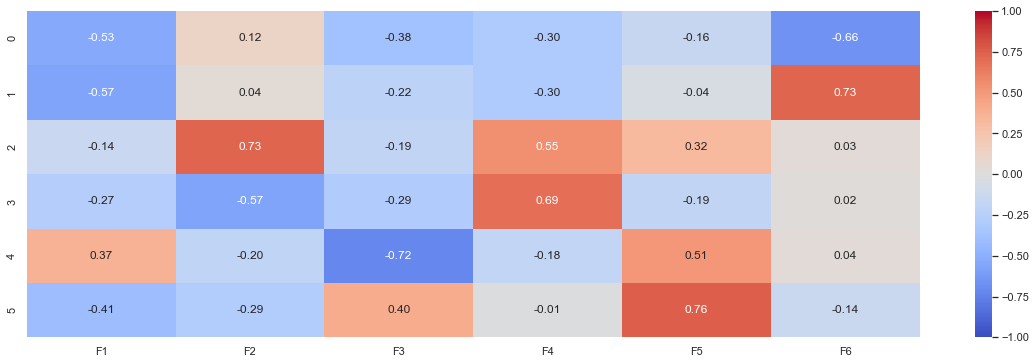

In [39]:
# Visualisation des corrélaritons avec heatmap
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")


In [40]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[0, i],  
                pca.components_[1, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[0, i] + 0.05,
                pca.components_[1, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    
    plt.title("Cercle des corrélations (F{} et F{})    {}% d'information".format(x+1, y+1, round(100*pca.explained_variance_ratio_[x],1)+round(100*pca.explained_variance_ratio_[y],1)))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)
    

In [41]:
x_y = (0,1)
x_y


(0, 1)

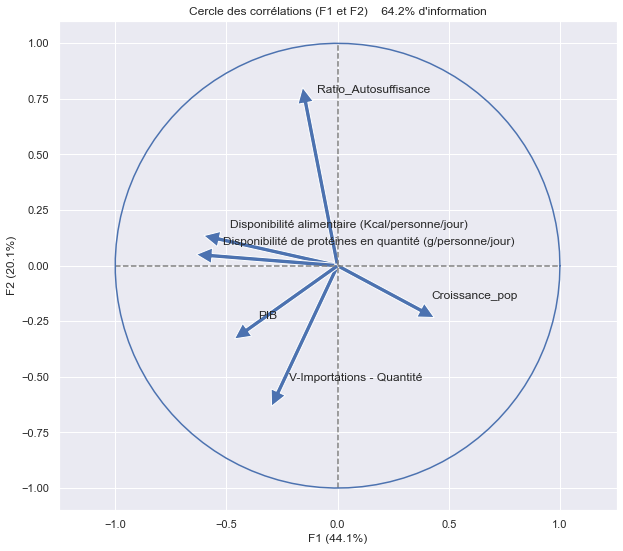

In [42]:
correlation_graph(pca, x_y, variables)


In [43]:
X_proj = pca.transform(X_scaled)
X_proj[:5]


array([[ 2.49715318e+00, -3.39531803e-01, -3.48681128e-01,
         1.69835832e-01,  2.81805237e-01,  2.90849880e-01],
       [-6.88641637e-01, -1.07522511e+00, -1.07152859e+00,
         1.55519528e+00, -6.34547339e-01,  3.21687500e-03],
       [-1.78046949e+00,  6.02542203e-01,  5.92880612e-02,
        -8.75632102e-01, -1.16240984e+00,  6.12500312e-01],
       [-2.05788406e-01, -1.18989703e-01, -8.13468596e-01,
        -1.25896233e+00, -3.38972434e-01, -1.60847816e-01],
       [-3.30276400e+00, -2.36626890e+00, -8.09521441e-01,
         2.25533166e+00, -2.85439653e-01, -2.57374402e-01]])

In [44]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    plt.scatter(   X_[:, x], 
                        X_[:, y], 
                        alpha=alpha, 
                        c=c, 
                        cmap="Set1", 
                        marker=marker)


    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

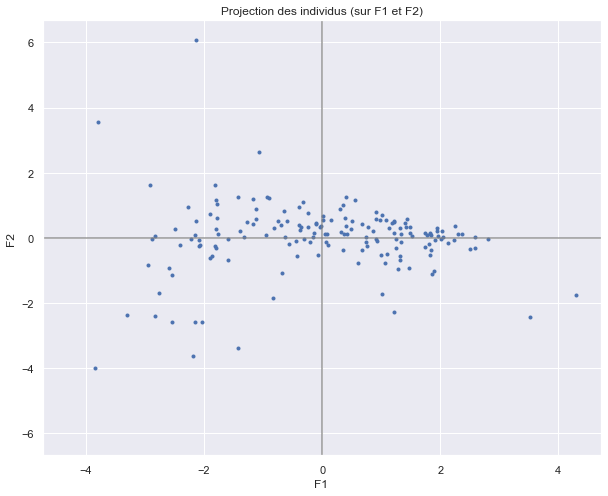

In [45]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y)


# 6 - KMeans

# K-means Clustering

#### Elbow Method

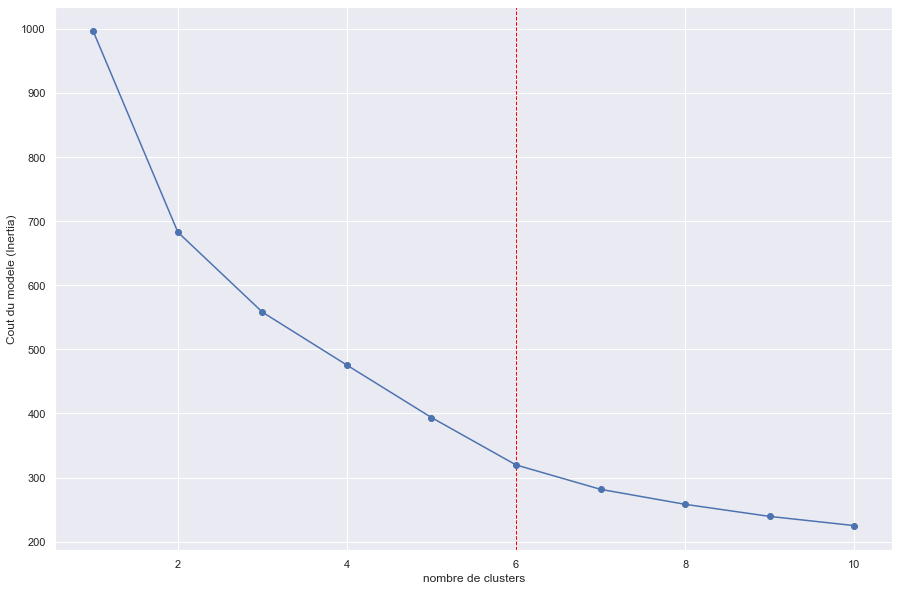

In [46]:
plt.figure(figsize=(15, 10))

inertia = []
K_range = range(1, 11)
for k in K_range:
    model = KMeans(n_clusters=k).fit(X_scaled)
    inertia.append(model.inertia_)
    
KM_nbr_cluster = 6
_ = plt.axvline(x = KM_nbr_cluster, color ="red", linestyle ="--", linewidth=1)

_ = plt.plot(K_range, inertia,marker='o')
_ = plt.xlabel("nombre de clusters")
_ = plt.ylabel("Cout du modele (Inertia)")


In [47]:
kmeans_model = KMeans(n_clusters=KM_nbr_cluster, random_state=3425).fit(X_scaled)


In [48]:
print("Nombre classes : ", kmeans_model.labels_.max()+1)
print("Les classes :\n", kmeans_model.labels_)


Nombre classes :  6
Les classes :
 [1 3 4 5 3 1 5 3 0 5 0 4 5 5 5 5 4 1 2 1 5 1 2 5 0 1 5 1 5 1 1 0 5 3 4 5 5
 1 5 5 1 4 1 5 5 4 0 5 5 4 3 4 1 1 1 5 4 1 1 1 5 5 1 1 0 5 5 5 1 4 0 4 4 5
 3 1 5 1 5 5 4 5 0 1 1 0 4 5 1 5 1 1 1 4 5 5 1 3 1 4 1 5 1 5 1 1 4 0 5 1 1
 5 1 5 5 3 1 4 4 5 0 3 1 1 4 5 5 5 1 5 5 5 5 1 5 1 5 4 1 5 4 5 4 1 1 1 4 5
 1 1 5 5 5 4 0 0 1 5 1 1 5 3 1 4 1 1]


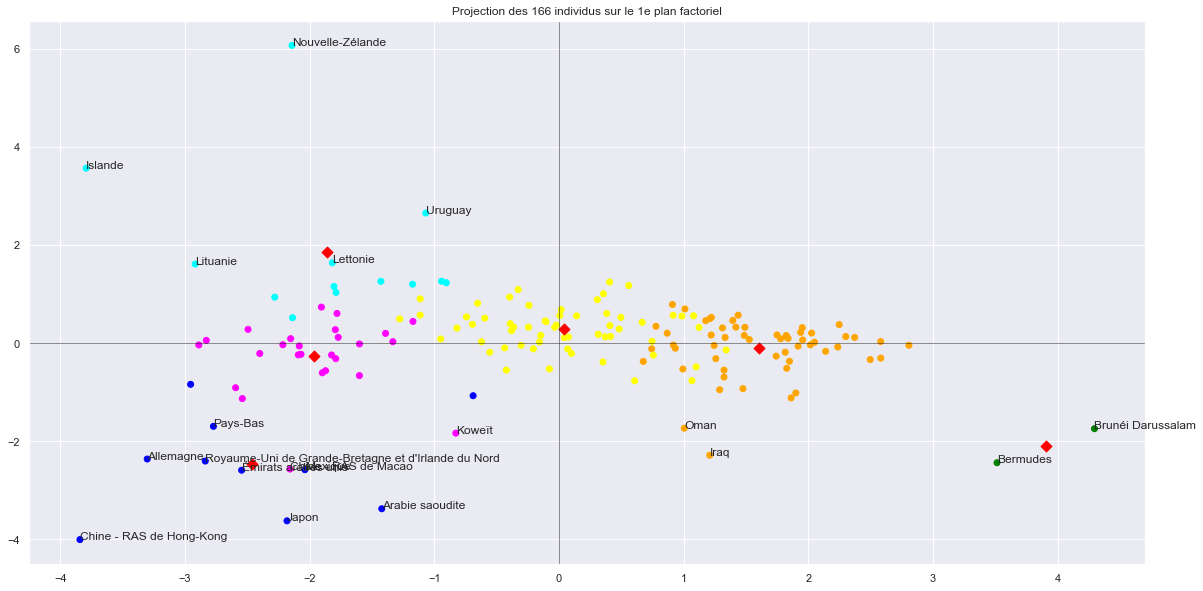

In [49]:
# Nombre de clusters souhaités
n_clust = KM_nbr_cluster

km = KMeans(n_clusters=n_clust, random_state=3425)
km.fit(X_scaled)

# Récupération des clusters attribués à chaque individu
clusters = km.labels_

# Affichage du clustering par projection des individus sur le premier plan factoriel
X_projected = pca.transform(X_scaled)

# utilisation de subplots nécessaire car annotation du graphique
fig, ax = plt.subplots(figsize = (20,10))

# https://matplotlib.org/stable/gallery/color/named_colors.html
LColor = ",".join([str(e) for e in clusters]).split(",")
LColor = [w.replace("0", "cyan") for w in LColor]
LColor = [w.replace("1", "orange") for w in LColor]
LColor = [w.replace("2", "green") for w in LColor]
LColor = [w.replace("3", "blue") for w in LColor]
LColor = [w.replace("4", "magenta") for w in LColor]
LColor = [w.replace("5", "yellow") for w in LColor]
LColor = [w.replace("6", "brown") for w in LColor]
LColor = [w.replace("7", "olive") for w in LColor]

plt.scatter(X_projected[:, 0], X_projected[:, 1], c=LColor)

centroids = km.cluster_centers_
centroids_projected = pca.transform(centroids)

# print(centroids_projected)
plt.scatter(centroids_projected[:,0],centroids_projected[:,1], c="red", marker = "D", s=60)

plt.axvline(x = 0.0, color ="k", linestyle ="-", linewidth=0.5)

plt.axhline(y = 0.0, color ="k", linestyle ="-", linewidth=0.5)

analyse_no_index_df = analyse_CR_df.reset_index()
i = 0
for k in X_projected:
    # annotation uniquement si valeur absolue sur une de 2 dimensions importantes (valeurs choisies empiriquement)
    if (abs(k[0]) > 3.5) | (abs(k[1]) > 1.50):
        ax.annotate(analyse_no_index_df['Zone'][i], (k[0], k[1]), fontsize = 12)
    i = i + 1


plt.title("Projection des {} individus sur le 1e plan factoriel".format(X_projected.shape[0]))
plt.show(block=False)


In [50]:
#index triés des groupes
idk = np.argsort(km.labels_)

temp_df = pd.DataFrame(analyse_CR_df.index[idk],km.labels_[idk])
temp_df.reset_index(inplace = True)
temp_df = temp_df.rename(columns={"index": "cluster"})
km_CR_clusters_df = analyse_CR_df.merge(temp_df, on="Zone", how="inner")
km_CR_clusters_df = km_CR_clusters_df.sort_values(by=["cluster"])
km_CR_clusters_df.head(5)


,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Ratio_Autosuffisance,V-Importations - Quantité,Croissance_pop,PIB,cluster
82,Lettonie,0.618273,0.766602,1.493761,-0.227697,-2.009539,0.359692,0
64,Hongrie,0.835720,0.334329,1.239182,-0.147047,-1.310460,0.398270,0
46,Estonie,0.748010,1.222056,1.040229,-0.345983,-1.096578,0.599706,0
70,Islande,1.456998,2.769783,4.548303,-0.448138,-0.664852,1.616799,0
85,Lituanie,1.073267,2.029783,1.359772,-0.222320,-2.175892,0.596909,0


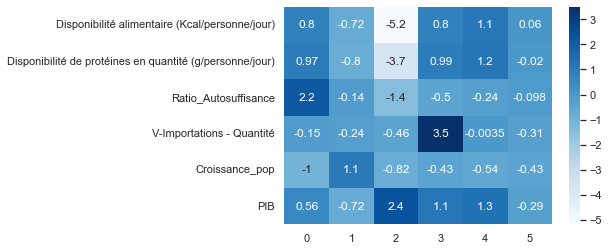

In [51]:
# centroids heatmap

df_centroides=pd.DataFrame(centroids, columns=analyse_CR_df.columns)

_ = sns.heatmap(np.transpose(df_centroides), cmap="Blues",annot = True)
_ = plt.show()


In [52]:
for i in km_CR_clusters_df['cluster'].unique() :
    print(f"Groupe {i+1} : ", len(km_CR_clusters_df[km_CR_clusters_df['cluster'] == i]['Zone'].tolist()))
    print(km_CR_clusters_df[km_CR_clusters_df['cluster'] == i]['Zone'].tolist())
    print()
    

Groupe 1 :  13
['Lettonie', 'Hongrie', 'Estonie', 'Islande', 'Lituanie', 'Canada', 'Bulgarie', 'Roumanie', 'Australie', 'Nouvelle-Zélande', 'Argentine', 'Ukraine', 'Uruguay']

Groupe 2 :  56
['Sénégal', 'Maldives', 'Malawi', 'Madagascar', 'Vanuatu', 'Libéria', 'Liban', 'Éthiopie', 'Kenya', 'Jordanie', 'Zambie', 'Iraq', 'Zimbabwe', 'Équateur', 'Honduras', 'Haïti', 'Guinée-Bissau', 'Guinée', 'Mali', 'Tadjikistan', 'Mauritanie', 'Timor-Leste', 'Soudan', 'Sierra Leone', 'Sao Tomé-et-Principe', 'République-Unie de Tanzanie', 'République centrafricaine', 'Rwanda', 'Togo', 'Philippines', 'Pakistan', 'Ouganda', 'Tchad', 'Oman', 'Guatemala', 'Nigéria', 'Niger', 'Namibie', 'Mozambique', 'Mongolie', 'Ghana', 'Afghanistan', 'Îles Salomon', 'Bolivie (État plurinational de)', 'Botswana', 'Gambie', 'Burkina Faso', 'Bénin', 'Cambodge', 'Cameroun', 'Congo', "Côte d'Ivoire", 'Djibouti', 'Angola', 'Belize', 'Gabon']

Groupe 3 :  2
['Brunéi Darussalam', 'Bermudes']

Groupe 4 :  10
['Émirats arabes unis', 

Disponibilité alimentaire (Kcal/personne/jour)
Disponibilité de protéines en quantité (g/personne/jour)
Ratio_Autosuffisance
V-Importations - Quantité
Croissance_pop
PIB


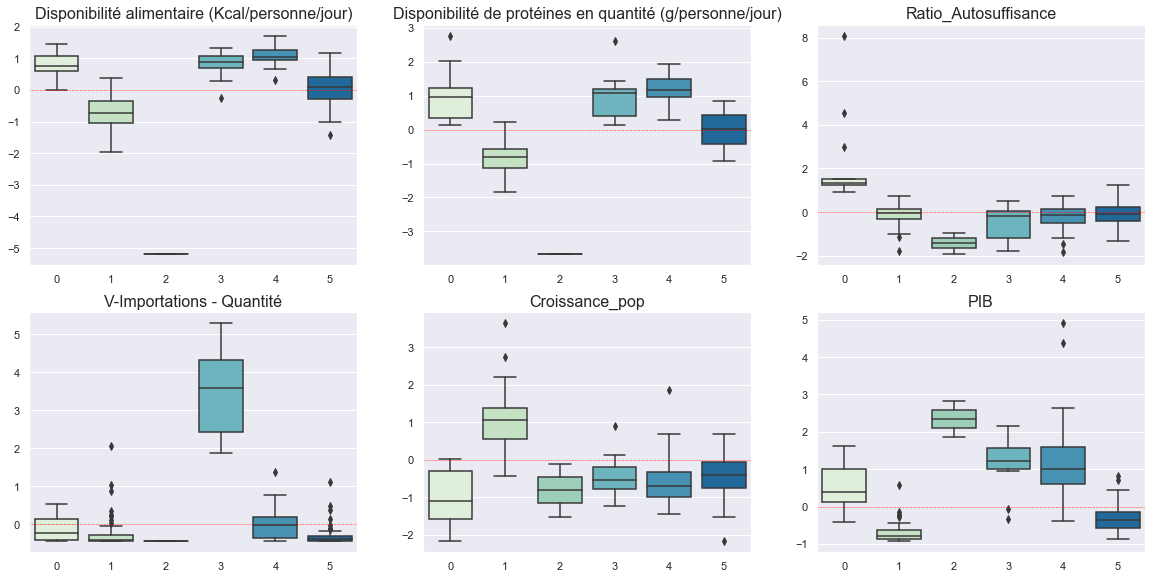

In [53]:
# Visualisation des clusters par variables
fig = plt.figure(figsize=(20,15),constrained_layout=False)
i = 331
for var in analyse_CR_df.columns :
    # var_hist(df_analyse, var, i)
    print(var)
    ax = fig.add_subplot(i)
    sns.boxplot(x="cluster", 
                y=var, 
                data=km_CR_clusters_df,
                palette ="GnBu").set(
                                        xlabel='', 
                                        ylabel=''
                                    )
    ax.axhline(y = 0.0, color ="red", linestyle ="--", linewidth=0.5) 
    _ = plt.title(var, fontsize=16)
    i+=1